## Prepare the staging environment

In [1]:
%env WEB_BASE_URL=https://hub.crunchdao.io
%env API_BASE_URL=http://api.hub.crunchdao.io

env: WEB_BASE_URL=https://hub.crunchdao.io
env: API_BASE_URL=http://api.hub.crunchdao.io


In [2]:
%pip install crunch-cli==4.0.0b5

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


### Get a token

**DO NOT UPGRADE THE CLI**

https://hub.crunchdao.io/competitions/enders/submit/via/notebook

In [3]:
!crunch setup --notebook enders test-antoine --token cMAlPAPk8LwN9DCwf7cDjiO3dbb0H1POLJVWHL6FDNIV0ri8ITUurgWU7cdnG8ph

delete ./.crunchdao
you appear to have never submitted code before
download data/X_train.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/X_train.parquet (1527571 bytes)
download data/y_train.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/y_train.parquet (1251294 bytes)
download data/X_test.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/X_test_reduced.parquet (162262 bytes)
download data/y_test.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/y_test_reduced.parquet (165953 bytes)
download data/example_prediction.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/example_prediction_reduced.parquet (165953 bytes)
                                                                                
---
Success! Your environment has been correctly setup.
Next recomme

## The submission

In [4]:
import typing
import random

import crunch
crunch = crunch.load_notebook()

loaded inline runner with module: <module '__main__'>


In [5]:
def train(
    streams: typing.List[typing.Iterable[float]]
):
    for stream in streams:
        pass
    print("training done")

In [6]:
def infer(
    stream: typing.Iterator[dict],
    horizon: int
):
    a = 0.01
    running_avg: int = None

    yield  # mark as ready

    for d in stream:
        x= d["x"]
        # tick
        if running_avg is None:
            running_avg = x
        else:
            running_avg = (1 - a) * running_avg + a * x

        # predict
        if x > running_avg + 2:
            yield -1
        elif x < running_avg - 2:
            yield 1
        else:
            # yield 0
            yield random.randint(-1, 1)

In [ ]:
prediction = crunch.test(
    no_determinism_check=True
)

In [7]:
streams, _ = crunch.load_streams()

download data/X_train.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/X_train.parquet (1527571 bytes)
already exists: file length match
download data/y_train.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/y_train.parquet (1251294 bytes)
already exists: file length match
download data/X_test.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/X_test_reduced.parquet (162262 bytes)
already exists: file length match
download data/y_test.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/y_test_reduced.parquet (165953 bytes)
already exists: file length match
download data/example_prediction.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/example_prediction_reduced.parquet (165953 bytes)
already exists: file length match


In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
from endersgame.widgets import replay

HTML(value='\n<style>\n    .table { \n        width: 100%; \n        margin-bottom: 1rem; \n        background…

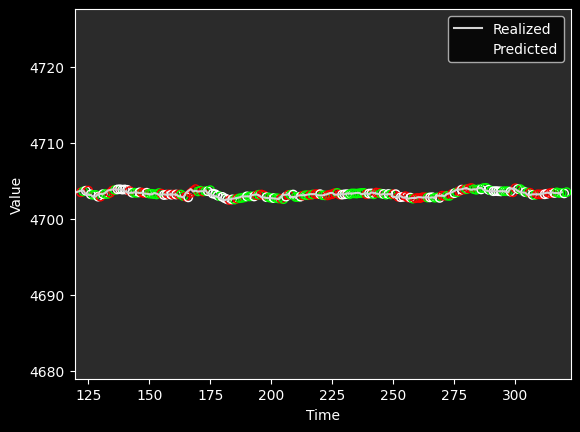

KeyboardInterrupt: 

In [12]:
replay(streams, 2)